# Lab 2 Data Visualization and Interpretation Using Matplotlib-I
<style>
@page {
    margin: 1in;
    @top-left {
        content: "ECSEI24303";
        font-weight: bold;
    }
    @top-right {
        content: "Data Visualization";
        font-weight: bold;
    }
    @bottom-left {
        content: "Lab-2";
    }
    @bottom-center {
        content: counter(page);
    }
    @bottom-right {
        content: "Roll No. : 1AUA23BCS155";
    }
}

/* 1. GLOBAL SETTINGS */
body {
    font-family: 'Inter', 'Segoe UI', Roboto, sans-serif;
    font-size: 11pt;
    line-height: 1.6;
    color: #2d3436;
    max-width: 800px;
    margin: 40px auto;
    padding: 20px;
    background-color: #fff;
}

/* 2. HEADINGS - Bold & Modern */
h1, h2, h3 {
    font-family: 'Montserrat', sans-serif;
    color: #0984e3; /* Data Blue */
    margin-top: 1.5em;
}

h1 { 
    border-bottom: 3px solid #0984e3; 
    padding-bottom: 10px;
    text-transform: uppercase;
}

/* 3. THE JETBRAINS MONO CODE BOXES */
pre, code {
    font-family: 'JetBrains Mono', monospace !important;
    font-variant-ligatures: contextual; /* Enables => and != */
}

pre {
    background-color: #f8f9fa;
    border: 1px solid #dcdde1;
    border-left: 5px solid #0984e3; /* Left accent border */
    padding: 15px;
    border-radius: 4px;
    overflow-x: auto;
    margin: 20px 0;
}

/* Inline code styling */
p > code {
    background-color: #f1f2f6;
    padding: 2px 5px;
    border-radius: 3px;
    font-size: 0.95em;
}

/* 4. VISUALIZATION BORDERS (Placeholders for Graphs) */
.viz-container {
    border: 2px dashed #b2bec3;
    border-radius: 8px;
    background-color: #fdfdfd;
    height: 300px; /* Placeholder height */
    display: flex;
    align-items: center;
    justify-content: center;
    margin: 20px 0;
    color: #636e72;
    font-style: italic;
}

/* 5. OBSERVATION & LAB NOTES BOX */
.observation-box {
    border: 1px solid #dfe6e9;
    background-color: #fffaf0; /* Light parchment feel */
    padding: 20px;
    border-radius: 5px;
    box-shadow: 2px 2px 5px rgba(0,0,0,0.05);
    margin-top: 30px;
}

.observation-box::before {
    content: "OBSERVATIONS";
    font-family: 'Montserrat', sans-serif;
    font-weight: bold;
    font-size: 0.8em;
    color: #e17055; /* Contrast color */
    display: block;
    margin-bottom: 10px;
}

/* 6. TABLE STYLING for Data Values */
table {
    width: 100%;
    border-collapse: collapse;
    margin: 20px 0;
}

th, td {
    border: 1px solid #dfe6e9;
    padding: 12px;
    text-align: left;
}

th {
    background-color: #0984e3;
    color: white;
    font-family: 'Montserrat', sans-serif;
}
</style>

## Import Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Dataset

In [2]:
df = pd.read_csv('House_Rent_Dataset.csv')
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


## 1. Line Plot - Rent vs. Size

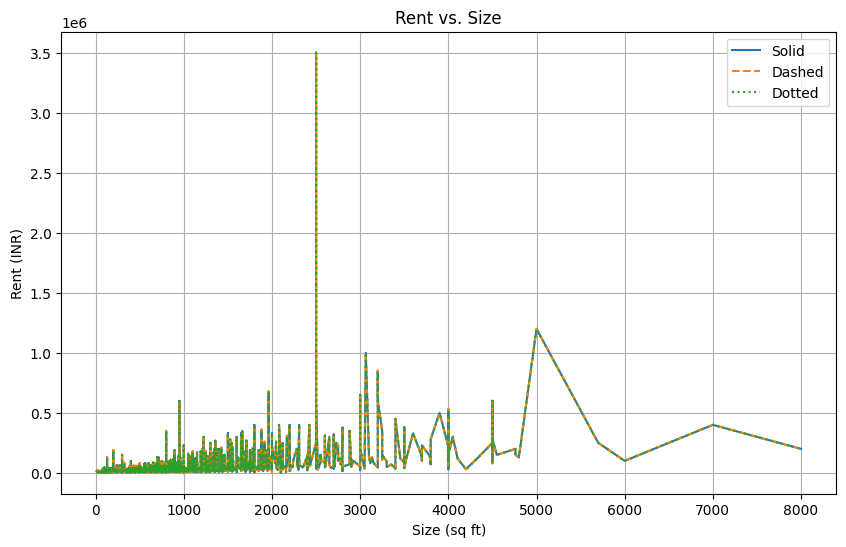

In [ ]:
df_sorted = df.sort_values('Size')
plt.figure(figsize=(10,6))
plt.plot(df_sorted['Size'], df_sorted['Rent'], linestyle='solid', label='Solid')
plt.plot(df_sorted['Size'], df_sorted['Rent'], linestyle='dashed', label='Dashed')
plt.plot(df_sorted['Size'], df_sorted['Rent'], linestyle='dotted', label='Dotted')
plt.grid(True)
plt.title("Rent vs. Size")
plt.xlabel("Size (sq ft)")
plt.ylabel("Rent (INR)")
plt.legend(loc='upper right')
plt.show()


## 2. Bar Chart - Average Rent by Furnishing Status

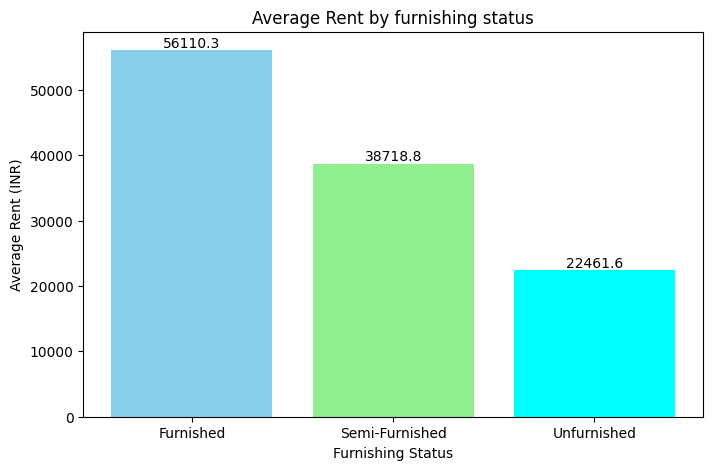

In [4]:
avg_rent = df.groupby('Furnishing Status')['Rent'].mean()
plt.figure(figsize=(8,5))
plt.bar(avg_rent.index, avg_rent.values, color=['skyblue', 'lightgreen', 'cyan'])
plt.title("Average Rent by furnishing status")
plt.xlabel('Furnishing Status')
plt.ylabel('Average Rent (INR)')
plt.bar_label(plt.bar(avg_rent.index,avg_rent.values, color=['skyblue', 'lightgreen', 'cyan']))
plt.show()

## 3. Scatter Plot - Bathrooms vs. Rent

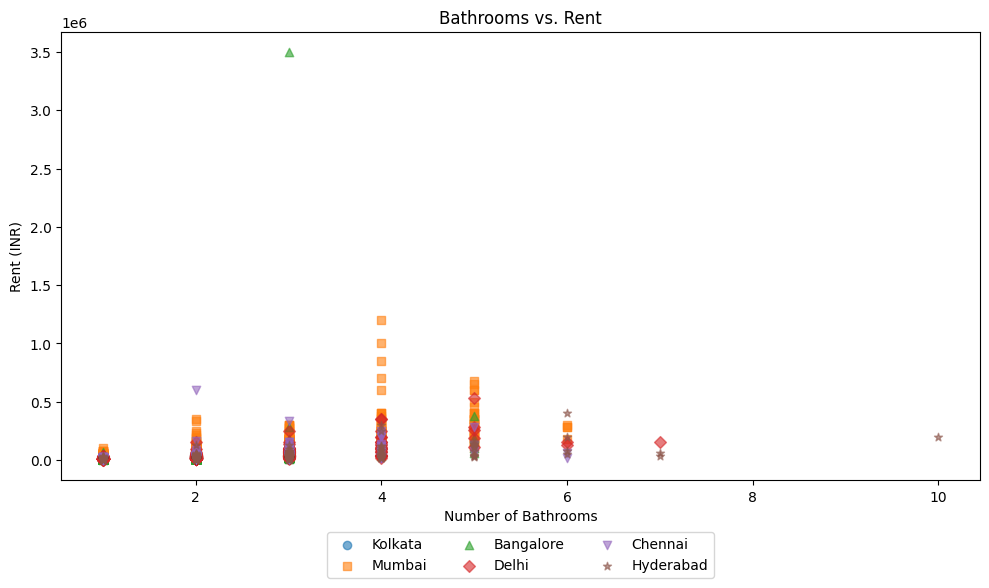

In [5]:
cities = df['City'].unique()
markers = ['o', 's', '^', 'D', 'v', '*', 'p']
plt.figure(figsize=(10,6))
for i, city in enumerate(cities):
    city_data = df[df['City'] == city]
    plt.scatter(city_data['Bathroom'], city_data['Rent'], marker=markers[i % len(markers)], label=city, alpha=0.6)
plt.title("Bathrooms vs. Rent")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Rent (INR)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.tight_layout()
plt.show()

## 4. Histogram - Distribution of Flat Sizes

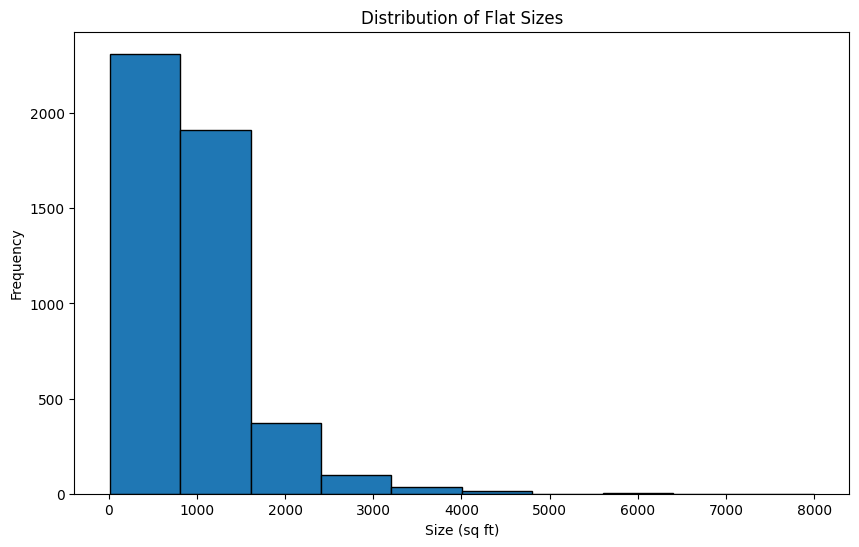

In [6]:
plt.figure(figsize=(10,6))
plt.hist(df['Size'], bins=10, edgecolor='black')
plt.title("Distribution of Flat Sizes")
plt.xlabel("Size (sq ft)")
plt.ylabel("Frequency")
plt.show()

## 5. Stacked Bar Chart - Flat Count by Furnishing Status and City

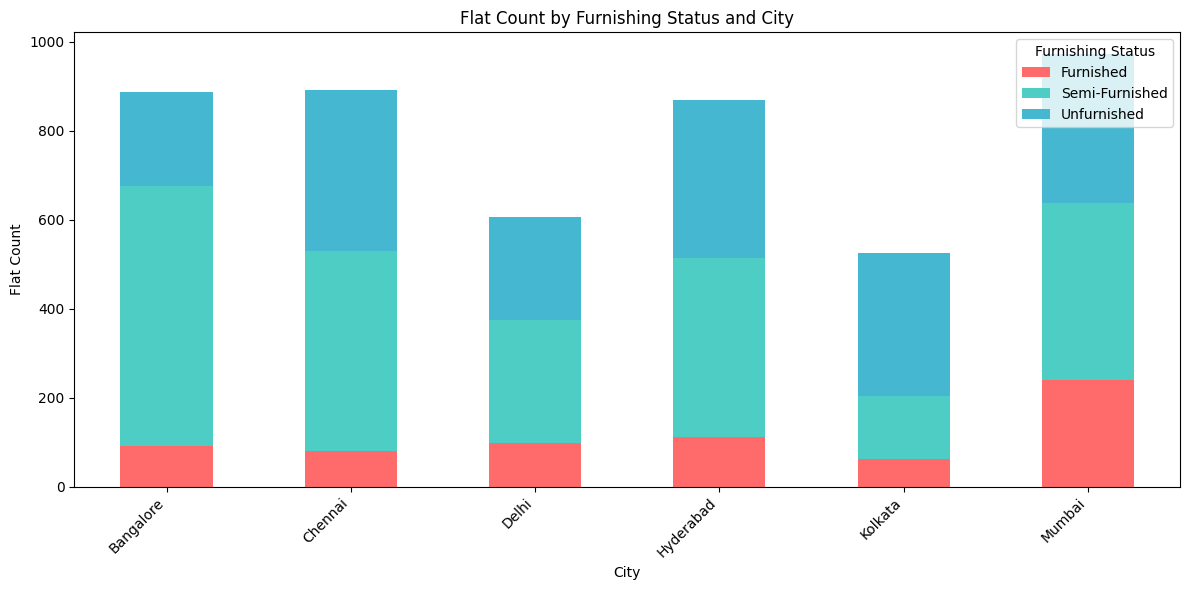

In [7]:
furnish_city = df.groupby(['City', 'Furnishing Status']).size().unstack(fill_value=0)
furnish_city.plot(kind='bar', stacked=True, figsize=(12,6), color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title("Flat Count by Furnishing Status and City")
plt.xlabel("City")
plt.ylabel("Flat Count")
plt.legend(title="Furnishing Status")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 6. Pie Chart - Distribution of Flats by City

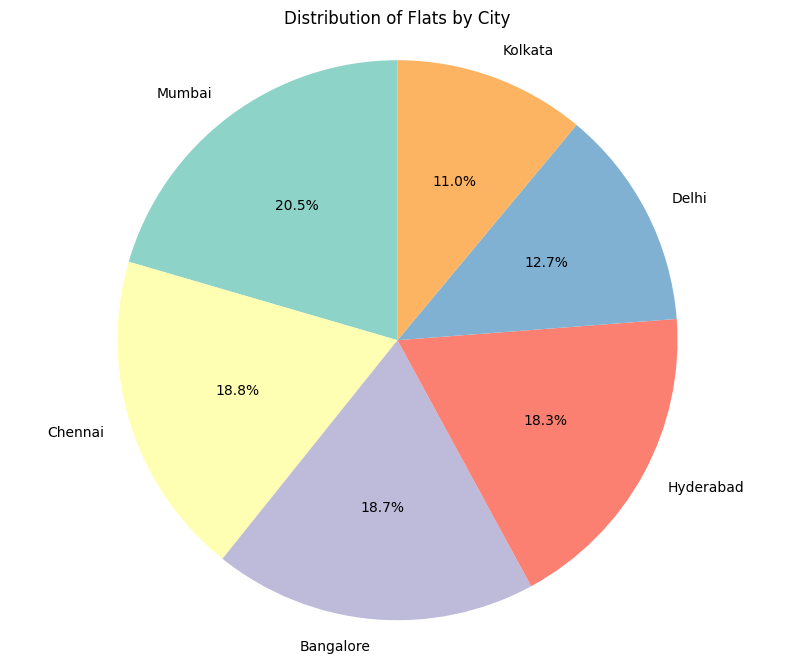

In [8]:
city_counts = df['City'].value_counts()
colors = plt.cm.Set3(range(len(city_counts)))
plt.figure(figsize=(10,8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Distribution of Flats by City")
plt.axis('equal')
plt.show()

## 7. Stacked Plot - Rent, Size, and Bathrooms

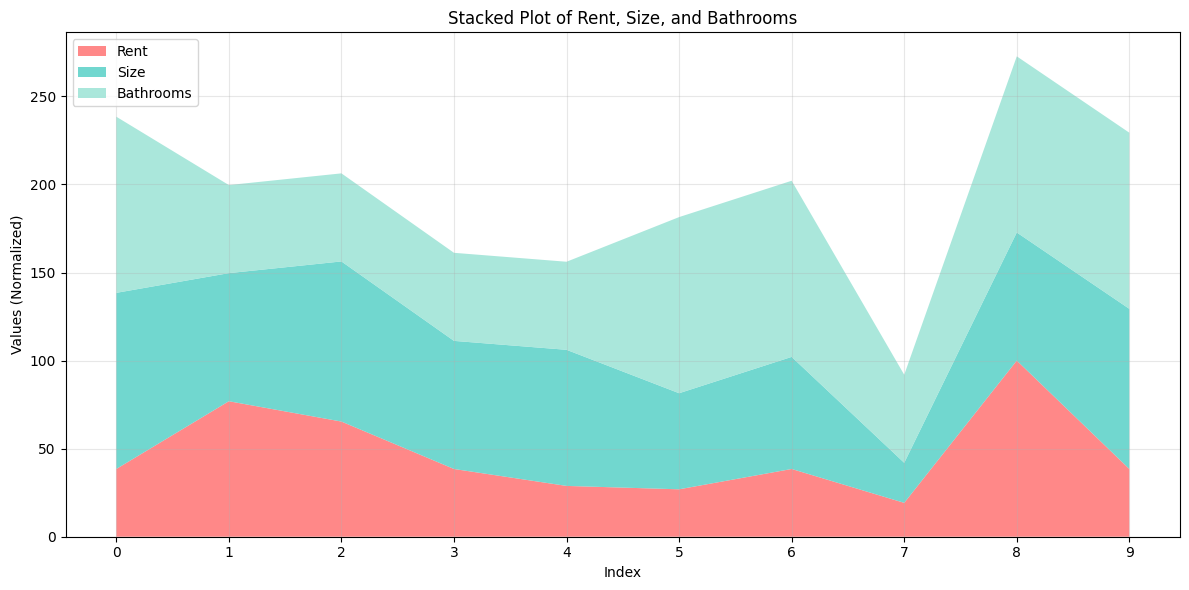

In [9]:
df_first10 = df.head(10)
x = np.arange(len(df_first10))
rent_normalized = df_first10['Rent'] / df_first10['Rent'].max() * 100
size_normalized = df_first10['Size'] / df_first10['Size'].max() * 100
bathroom_normalized = df_first10['Bathroom'] / df_first10['Bathroom'].max() * 100

plt.figure(figsize=(12,6))
plt.stackplot(x, rent_normalized, size_normalized, bathroom_normalized, 
              labels=['Rent', 'Size', 'Bathrooms'], 
              colors=['#FF6B6B', '#4ECDC4', '#95E1D3'],
              alpha=0.8)
plt.title("Stacked Plot of Rent, Size, and Bathrooms")
plt.xlabel("Index")
plt.ylabel("Values (Normalized)")
plt.legend(loc='upper left')
plt.xticks(x)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()